# Part 1. Quantitative Analysis of the Industry Sector

### A. Industry Sector Selection and Data Filtering

#### 1. Selected Sector: Apparel And Accessory Stores ( Major Group = 56 )

#### 2. filter the data to identify relevant firms

In [1]:
#Cara's
import pandas as pd
# Methods for achieving the goals above were obtained through interaction with ChatGPT
import os
os.listdir("data")
from nltk.corpus import stopwords
from collections import Counter
import re, string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
# import relavant packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

In [2]:
#import dataa
os.listdir("data")
K10 = pd.read_csv(r'data/2020_10K_item1_full.csv')
m_g = pd.read_csv(r'data/major_groups.csv')
p_f = pd.read_csv(r'data/public_firms.csv')

In [3]:
p_f.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
0,1004,1994,USA,AAR CORP,1988/01/01,5080,13.375,22.487,10.463,425.814,451.395,0.024572
1,1004,1995,USA,AAR CORP,1988/01/01,5080,22.000,33.606,16.012,437.846,504.990,0.036570
2,1004,1996,USA,AAR CORP,1988/01/01,5080,30.250,51.705,23.025,529.584,589.328,0.043478
3,1004,1997,USA,AAR CORP,1988/01/01,5080,38.750,17.222,35.657,670.559,782.123,0.053175
4,1004,1998,USA,AAR CORP,1988/01/01,5080,23.875,8.250,41.671,726.630,918.036,0.057348


#### 3. Answering several questions based on the filtered dataset

## We select  'Apparel And Accessory Stores' as our sector, major_group	 = 56

In [4]:
'''
Codes inspired by ChatGPT
Prompt:how to inner join two dataframe in python
Returned codes:
    import pandas as pd

    # Create two example dataframes
    df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                        'value1': [1, 2, 3, 4]})
    df2 = pd.DataFrame({'key': ['B', 'D', 'E', 'F'],
                        'value2': [5, 6, 7, 8]})

    # Perform an inner join on the 'key' column
    inner_merged = pd.merge(df1, df2, on='key', how='inner')

    # Display the merged dataframe
    print("Inner Merged DataFrame:")
    print(inner_merged)

Modified the input data
'''

'\nCodes inspired by ChatGPT\nPrompt:how to inner join two dataframe in python\nReturned codes:\n    import pandas as pd\n\n    # Create two example dataframes\n    df1 = pd.DataFrame({\'key\': [\'A\', \'B\', \'C\', \'D\'],\n                        \'value1\': [1, 2, 3, 4]})\n    df2 = pd.DataFrame({\'key\': [\'B\', \'D\', \'E\', \'F\'],\n                        \'value2\': [5, 6, 7, 8]})\n\n    # Perform an inner join on the \'key\' column\n    inner_merged = pd.merge(df1, df2, on=\'key\', how=\'inner\')\n\n    # Display the merged dataframe\n    print("Inner Merged DataFrame:")\n    print(inner_merged)\n\nModified the input data\n'

In [5]:
p_f['major_group'] = p_f['sic'].astype(str).str[:2]

#convert major_group in m_g to str so that we can merge m_g with p_f
m_g['major_group'] = m_g['major_group'].astype(str)
newp_f = pd.merge(p_f, m_g, on = 'major_group', how = 'left')
newp_f.head()


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,major_group,description
0,1004,1994,USA,AAR CORP,1988/01/01,5080,13.375,22.487,10.463,425.814,451.395,0.024572,50,Wholesale Trade-durable Goods
1,1004,1995,USA,AAR CORP,1988/01/01,5080,22.000,33.606,16.012,437.846,504.990,0.036570,50,Wholesale Trade-durable Goods
2,1004,1996,USA,AAR CORP,1988/01/01,5080,30.250,51.705,23.025,529.584,589.328,0.043478,50,Wholesale Trade-durable Goods
3,1004,1997,USA,AAR CORP,1988/01/01,5080,38.750,17.222,35.657,670.559,782.123,0.053175,50,Wholesale Trade-durable Goods
4,1004,1998,USA,AAR CORP,1988/01/01,5080,23.875,8.250,41.671,726.630,918.036,0.057348,50,Wholesale Trade-durable Goods


In [6]:
df = newp_f[newp_f['major_group']== '56']
df.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,major_group,description
5923,2484,1995,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,10.2500,14.520,14.866,735.269,1584.942,0.020218,56,Apparel And Accessory Stores
5924,2484,1996,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,13.0000,73.560,29.013,704.731,1591.964,0.041169,56,Apparel And Accessory Stores
5925,2484,1997,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,16.4370,157.394,56.515,775.077,1758.368,0.072915,56,Apparel And Accessory Stores
5926,2484,1998,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,16.3125,106.952,47.783,941.635,1988.513,0.050745,56,Apparel And Accessory Stores
5927,2484,1999,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,13.8750,127.818,61.120,1046.047,2198.696,0.058429,56,Apparel And Accessory Stores


In [7]:
df = newp_f[newp_f['description']== 'Apparel And Accessory Stores']
df.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,major_group,description
5923,2484,1995,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,10.2500,14.520,14.866,735.269,1584.942,0.020218,56,Apparel And Accessory Stores
5924,2484,1996,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,13.0000,73.560,29.013,704.731,1591.964,0.041169,56,Apparel And Accessory Stores
5925,2484,1997,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,16.4370,157.394,56.515,775.077,1758.368,0.072915,56,Apparel And Accessory Stores
5926,2484,1998,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,16.3125,106.952,47.783,941.635,1988.513,0.050745,56,Apparel And Accessory Stores
5927,2484,1999,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,13.8750,127.818,61.120,1046.047,2198.696,0.058429,56,Apparel And Accessory Stores


### How many unique firm-year ("fyear") observations are there in the filtered dataset?

In [8]:
a = len(df['fyear'].unique())

print('3.1: There are '+ str(a) + ' unique firm-year observations in the filtered dataset.')


3.1: There are 27 unique firm-year observations in the filtered dataset.


### How many unique firms are there in the filtered dataset?

In [9]:
b = len(df['gvkey'].unique())
print('3.2: There are '+ str(b)+' unique firms in the filtered dataset.')

3.2: There are 105 unique firms in the filtered dataset.


### How many firms in the filtered dataset have records over all 27 years (1994-2020)?

In [10]:
h94 = df[df['fyear'] == 1994]
h20 = df[df['fyear'] == 2020]
ttl27 = pd.merge(h94, h20, on = 'gvkey', how = 'inner')
c = len(ttl27['gvkey'].unique())

print('3.3: There are '+ str(c)+' firms in the filtered dataset have records over all 27 years.')

3.3: There are 11 firms in the filtered dataset have records over all 27 years.


### B. Preliminary Analysisering

#### 1. The top 10 firms with the highest stock price in the year 2020

In [11]:
#select the top 10 firms from the dataframe
top10_prcc = df[df['fyear']==2020].sort_values('prcc_c', ascending=False)[['conm','prcc_c']][0:10]

In [12]:
top10_prcc.reset_index(drop=True, inplace=True)
top10_prcc.index += 1
top10_prcc.rename_axis('Rank', inplace=True)
top10_prcc

,conm,prcc_c
Rank,,
1,BURLINGTON STORES INC,261.55
2,ROSS STORES INC,122.81
3,TJX COS INC (THE),68.29
4,CHILDRENS PLACE INC,50.10
5,CITI TRENDS INC,49.68
6,BOOT BARN HOLDINGS INC,43.36
7,FOOT LOCKER INC,40.44
8,SHOE CARNIVAL INC,39.18
9,BATH & BODY WORKS INC,37.19


#### 2. The top 10 firms with the highest sales in the entire history of the dataset

##### Cara: why not groupby conm

In [13]:
filter_sale = df.groupby('conm').sum('sale').sort_values('sale',ascending=False)[0:10]['sale']
filter_sale

conm
TJX COS INC (THE)             531354.915
GAP INC                       362527.300
BATH & BODY WORKS INC         274942.175
NORDSTROM INC                 248159.506
ROSS STORES INC               188529.105
FOOT LOCKER INC               167706.000
ABERCROMBIE & FITCH  -CL A     67874.646
ASCENA RETAIL GROUP INC        65366.513
AMERN EAGLE OUTFITTERS INC     63138.850
DESIGNER BRANDS INC            57096.129
Name: sale, dtype: float64

#### 3. The geographical distribution of all the firms -- the top 10 locations

In [14]:
c_l= df[[ 'conm','location']].drop_duplicates()
c_l

,conm,location
5923,BURLINGTON COAT FACTORY INVS,USA
6468,CACHE INC,USA
7076,CATO CORP -CL A,USA
7564,CHARMING SHOPPES INC,USA
8310,CLAIRES STORES INC,USA
...,...,...
199846,EXPRESS INC,USA
200847,G-ESTATE LIQUIDATION STORES,USA
200914,BODY CENTRAL CORP,USA
203001,FHC HOLDINGS CORP,USA


In [15]:
top10_location = c_l.value_counts('location')[0:10]
top10_location

location
USA    104
CAN      1
dtype: int64

#### 4. Line chart to show the average stock price in the selected sector across the years

In [16]:
df = newp_f[newp_f['major_group']== '56']
df.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,major_group,description
5923,2484,1995,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,10.2500,14.520,14.866,735.269,1584.942,0.020218,56,Apparel And Accessory Stores
5924,2484,1996,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,13.0000,73.560,29.013,704.731,1591.964,0.041169,56,Apparel And Accessory Stores
5925,2484,1997,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,16.4370,157.394,56.515,775.077,1758.368,0.072915,56,Apparel And Accessory Stores
5926,2484,1998,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,16.3125,106.952,47.783,941.635,1988.513,0.050745,56,Apparel And Accessory Stores
5927,2484,1999,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,13.8750,127.818,61.120,1046.047,2198.696,0.058429,56,Apparel And Accessory Stores


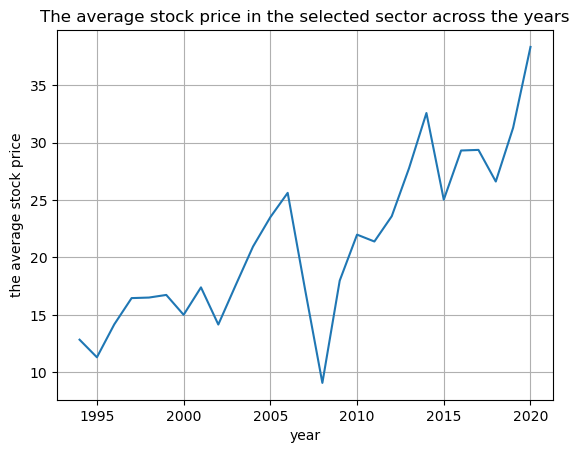

In [17]:
ave_stock_price = df.groupby(['fyear'])[['prcc_c']].mean()
plt.plot(ave_stock_price)
plt.title('The average stock price in the selected sector across the years')
plt.xlabel('year')
plt.ylabel('the average stock price')
plt.grid(True) 
plt.show()

#### 5. The firm which was affected the most by the 2008 Financial Crisis

In [18]:
#Codes for calculating percentage changes are inspired by ChatGPT 3.5
filtered_df = df[df['fyear'].isin([2007,2008])]
filtered_df

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,major_group,description
5935,2484,2007,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,NaN,40.101,-48.970,2964.492,3423.973,-0.016519,56,Apparel And Accessory Stores
5936,2484,2008,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,NaN,25.810,-191.583,2533.368,3571.367,-0.075624,56,Apparel And Accessory Stores
6480,2595,2007,USA,CACHE INC,NaN,5621,9.34,7.243,6.521,149.125,274.458,0.043728,56,Apparel And Accessory Stores
6481,2595,2008,USA,CACHE INC,NaN,5621,2.02,4.835,-7.122,119.525,265.728,-0.059586,56,Apparel And Accessory Stores
7089,2818,2007,USA,CATO CORP -CL A,NaN,5621,15.66,21.583,32.319,420.792,846.437,0.076805,56,Apparel And Accessory Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198829,183570,2007,USA,RUE21 INC,2009/11/13,5600,NaN,3.343,9.133,102.285,296.887,0.089290,56,Apparel And Accessory Stores
198830,183570,2008,USA,RUE21 INC,2009/11/13,5600,NaN,4.611,12.639,141.200,391.414,0.089511,56,Apparel And Accessory Stores
199846,184323,2008,USA,EXPRESS INC,2010/05/13,5600,NaN,176.115,-29.036,860.413,1737.010,-0.033747,56,Apparel And Accessory Stores
200847,185190,2008,USA,G-ESTATE LIQUIDATION STORES,2010/08/05,5600,NaN,5.218,2.387,77.859,438.135,0.030658,56,Apparel And Accessory Stores


In [19]:
filtered_df['yearlychange'] = filtered_df.groupby('conm')['prcc_c'].pct_change() * 100
filtered_df.head()

C:\Users\卡拉酱\AppData\Local\Temp\ipykernel_28836\3899474728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['yearlychange'] = filtered_df.groupby('conm')['prcc_c'].pct_change() * 100


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,major_group,description,yearlychange
5935,2484,2007,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,NaN,40.101,-48.970,2964.492,3423.973,-0.016519,56,Apparel And Accessory Stores,NaN
5936,2484,2008,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,NaN,25.810,-191.583,2533.368,3571.367,-0.075624,56,Apparel And Accessory Stores,NaN
6480,2595,2007,USA,CACHE INC,NaN,5621,9.34,7.243,6.521,149.125,274.458,0.043728,56,Apparel And Accessory Stores,NaN
6481,2595,2008,USA,CACHE INC,NaN,5621,2.02,4.835,-7.122,119.525,265.728,-0.059586,56,Apparel And Accessory Stores,-78.372591
7089,2818,2007,USA,CATO CORP -CL A,NaN,5621,15.66,21.583,32.319,420.792,846.437,0.076805,56,Apparel And Accessory Stores,NaN


In [20]:
affacted_firm = filtered_df.sort_values('yearlychange',ascending = True).iloc[0,3]
print(f'{affacted_firm} is the firm that was affected the most by the 2008 Financial Crisis, as measured by the percentage drop in stock price from 2007 to 2008 ')

EDDIE BAUER HOLDINGS INC is the firm that was affected the most by the 2008 Financial Crisis, as measured by the percentage drop in stock price from 2007 to 2008 


In [21]:
filtered_df[filtered_df['conm'] == affacted_firm]

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,major_group,description,yearlychange
185813,164058,2007,USA,EDDIE BAUER HOLDINGS INC,NaN,5600,6.35,27.596,-101.718,811.432,1044.353,-0.125356,56,Apparel And Accessory Stores,NaN
185814,164058,2008,USA,EDDIE BAUER HOLDINGS INC,NaN,5600,0.51,60.425,-165.529,596.920,1023.437,-0.277305,56,Apparel And Accessory Stores,-91.968504


#### 6.	Plot the average Return on Assets (ROA) for the firms located in the “USA” across the years

C:\Users\卡拉酱\AppData\Local\Temp\ipykernel_28836\1097674747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROA'] = df['ni']/df['asset']


<AxesSubplot:xlabel='fyear'>

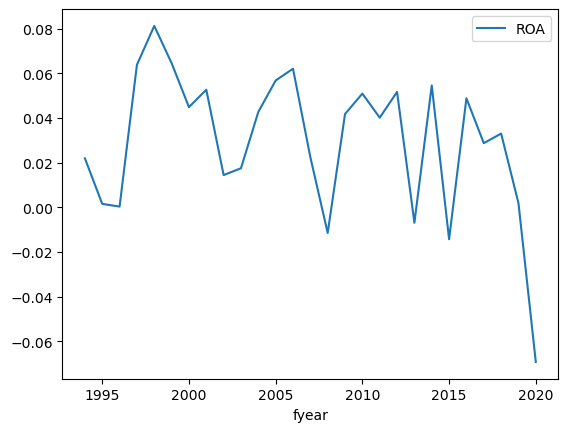

In [22]:
df['ROA'] = df['ni']/df['asset']
dfROA = df[df['location']=='USA'].groupby('fyear').mean('ROA')
dfROA= dfROA.reset_index()
dfROA.plot(x='fyear', y='ROA')

# Part 2 Text Analysis on the Industry Sector

### C Text Cleaning

#### 1.Convert all words to lowercase. 

In [23]:
#1.Convert all words to lowercase. 
K10['item1'] = K10['item_1_text'].str.lower()
K10['item1']

0       fixed expenses are previosuly documented in an...
1       general hurco companies, inc. is an internatio...
2       we have been engaged in the business of develo...
3       corporate history chun can capital group (form...
4       corporate history chun can capital group (form...
                              ...                        
5476    general rf industries, ltd. (together with sub...
5477    background and capital structure know labs, in...
5478    general gee group inc. (the  company ,  us ,  ...
5479    general gulfslope energy, inc. is an independe...
5480    (a) general development of business. north eur...
Name: item1, Length: 5481, dtype: object

#### 2.Remove punctuations.

In [24]:
#2.Remove punctuations.
import string
K10['item1'] = K10['item1'].str.replace('[{}]'.format(string.punctuation), '')
K10['item1']

C:\Users\卡拉酱\AppData\Local\Temp\ipykernel_28836\1190700446.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  K10['item1'] = K10['item1'].str.replace('[{}]'.format(string.punctuation), '')


0       fixed expenses are previosuly documented in an...
1       general hurco companies inc is an internationa...
2       we have been engaged in the business of develo...
3       corporate history chun can capital group forme...
4       corporate history chun can capital group forme...
                              ...                        
5476    general rf industries ltd together with subsid...
5477    background and capital structure know labs inc...
5478    general gee group inc the  company   us   our ...
5479    general gulfslope energy inc is an independent...
5480    a general development of business north europe...
Name: item1, Length: 5481, dtype: object

#### 3.Remove stop words based on the list of English stop words in NLTK.

In [25]:
#3.Remove stop words based on the list of English stop words in NLTK.
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') 
stop_words = set(stopwords.words("English"))
K10['item1'] = K10['item1'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
K10['item1']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\卡拉酱\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       fixed expenses previosuly documented 8k 235000...
1       general hurco companies inc international indu...
2       engaged business developing marketing products...
3       corporate history chun capital group formerly ...
4       corporate history chun capital group formerly ...
                              ...                        
5476    general rf industries ltd together subsidiarie...
5477    background capital structure know labs inc inc...
5478    general gee group inc company us incorporated ...
5479    general gulfslope energy inc independent crude...
5480    general development business north european oi...
Name: item1, Length: 5481, dtype: object

# D. Conduct keywords analysis 

#### 1.	Create a new DataFrame that includes only firms in your selected industry sectors

In [46]:
tgt = pd.merge(df, K10, on = 'gvkey', how = 'inner')
tgt[['gvkey','fyear','conm','sale','item1']].head()

,gvkey,fyear,conm,sale,item1
0,2818,1994,CATO CORP -CL A,476.186,general company founded 1946 operated 1281 fas...
1,2818,1995,CATO CORP -CL A,489.995,general company founded 1946 operated 1281 fas...
2,2818,1996,CATO CORP -CL A,491.509,general company founded 1946 operated 1281 fas...
3,2818,1997,CATO CORP -CL A,512.448,general company founded 1946 operated 1281 fas...
4,2818,1998,CATO CORP -CL A,543.664,general company founded 1946 operated 1281 fas...


#### 2.Generate the top 10 keywords for each firm based on two different methods: word counts and TF-IDF score.

In [27]:
def get_keywords_wc(text):
    c = Counter(text.split())
    words = []
    for pair in c.most_common(10):
        words.append(pair[0])
    return ' '.join(words)

def get_keywords_tfidf(document_list):
    '''
    Input: A list of documents (text)
    Output: The corresponding top 10 keywords for each document based on tf-idf values
    '''

    # Step 1: Create the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Step 2: Calculate the TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(document_list)

    # Step 3: Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Step 4: Extract top 10 keywords for each text
    top_keywords = []
    for i in range(len(document_list)):

        if i %50 == 0:
            print(f'Processing the {i}/{len(document_list)} document.')
        
        feature_index = tfidf_matrix[i, :].nonzero()[1]
        tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        top_keywords.append(' '.join([feature_names[i] for i, _ in sorted_tfidf_scores[:10]]))
    
    return top_keywords

In [28]:
# word counts
tgt['keywords1'] = tgt['item1'].apply(get_keywords_wc)
#TF-IDF score
keywords = get_keywords_tfidf(tgt['item1'].tolist())
tgt['keyword_clean_tfidf'] =  keywords

Processing the 0/668 document.
Processing the 50/668 document.
Processing the 100/668 document.
Processing the 150/668 document.
Processing the 200/668 document.
Processing the 250/668 document.
Processing the 300/668 document.
Processing the 350/668 document.
Processing the 400/668 document.
Processing the 450/668 document.
Processing the 500/668 document.
Processing the 550/668 document.
Processing the 600/668 document.
Processing the 650/668 document.


In [38]:
tgt[['conm','keywords1','keyword_clean_tfidf']].head()

,conm,keywords1,keyword_clean_tfidf
0,CATO CORP -CL A,company merchandise stores sales credit store ...,company merchandise layaway stores credit sale...
1,CATO CORP -CL A,company merchandise stores sales credit store ...,company merchandise layaway stores credit sale...
2,CATO CORP -CL A,company merchandise stores sales credit store ...,company merchandise layaway stores credit sale...
3,CATO CORP -CL A,company merchandise stores sales credit store ...,company merchandise layaway stores credit sale...
4,CATO CORP -CL A,company merchandise stores sales credit store ...,company merchandise layaway stores credit sale...


#### 3.	Create two wordclouds to visualize the keywords across all firms in the selected sector

In [30]:
# prepare text
forcould = tgt[['conm','keywords1','keyword_clean_tfidf']].drop_duplicates()

kwbycnt = ' '.join(forcould['keywords1'].tolist())
kwbytf = ' '.join(forcould['keyword_clean_tfidf'].tolist())

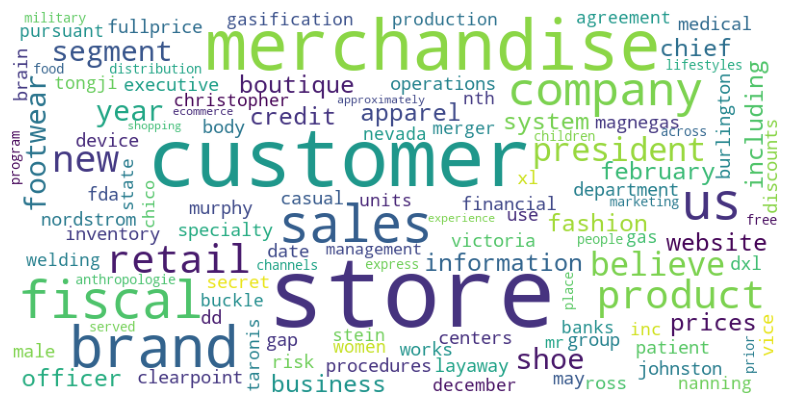

In [31]:
# lower max_font_size
wordcloud1 = WordCloud(width=800, height=400, max_font_size= 100, background_color='white').generate(kwbycnt) # note that text is a string, not a list

plt.figure(figsize=(10,5))
plt.imshow(wordcloud1)
plt.savefig('keyword_wc.png') # save as PNG file
plt.axis('off')

plt.show()

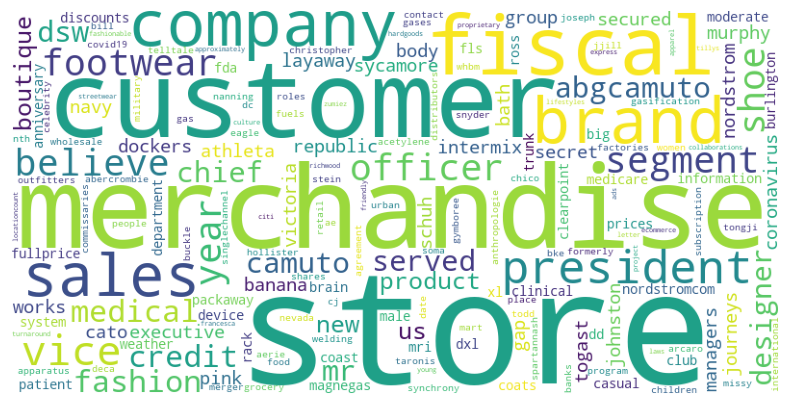

In [32]:
# lower max_font_size
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(kwbytf) # note that text is a string, not a list

plt.figure(figsize=(10,5))
plt.imshow(wordcloud2)
plt.savefig('keyword_tfidf.png') # save as PNG file
plt.axis('off')

plt.show()

## E. Train a word2vec model and analyze word similarities.

#### 1.	Train a word2vec model with the full 10-K sample. 

In [33]:
sent = [row.split() for row in tgt['item1']]

In [34]:
# training word2vec model using the list of words in `sent`
model = Word2Vec(sent, min_count=1, vector_size=50, \
                 workers=3, window=3, sg = 1)
model.save("word2vec.model")

In [35]:
#load the model
model = Word2Vec.load("word2vec.model")

#### 2.	Manually inspect the wordclouds you generated in D.3 and choose three representative keywords that are relevant to the industry sector of your interest. Utilize the trained word2vec model to find the most relevant five words for each of these three keywords.

In [36]:
wc1 = ['store', 'customer','merchandise']
for i in wc1:
    print(model.wv.most_similar(i)[:5],'\n')

[('stores', 0.7594236731529236), ('volume', 0.6647012233734131), ('differs', 0.6631938815116882), ('shipto', 0.6457440853118896), ('fifteen', 0.6441264152526855)] 

[('optimum', 0.7921862602233887), ('•consistently', 0.7284924983978271), ('guiding', 0.7129738330841064), ('customers', 0.7063345313072205), ('•utilizing', 0.7007634043693542)] 

[('shifting', 0.6891855001449585), ('dynamically', 0.6851708292961121), ('intentionally', 0.6749264597892761), ('600', 0.6723715662956238), ('pastseason', 0.6673030257225037)] 



# Part 3.Comprehensive Analysis of One Sample Firm

#### 1.find the focal firm’s competing firms. Our focal firm is GAP INC （gvkey = 4990）

In [39]:
# Load the wrapper the instructor team prepared for you 
from DocumentSimilarity import DocumentSimilarity
tgta = tgt[['gvkey','conm','keyword_clean_tfidf']].drop_duplicates()
# Create an instance
d = DocumentSimilarity(model = model, gvkeys=tgta['gvkey'], \
                       conm = tgta['conm'], 
                       keywordslist = tgta['keyword_clean_tfidf'])

In [40]:
d.most_similar(firm = 4990, topn = 20)

[(63643, 'ABERCROMBIE & FITCH  -CL A', 0.82959425),
 (30059, 'AMERN EAGLE OUTFITTERS INC', 0.82674134),
 (27938, 'SHOE CARNIVAL INC', 0.8253212),
 (25234, 'BUCKLE INC', 0.73096967),
 (25167, 'TAILORED BRANDS INC', 0.69738495),
 (65430, 'CHILDRENS PLACE INC', 0.6126663),
 (27981, 'CHICOS FAS INC', 0.59982586),
 (6733, 'BATH & BODY WORKS INC', 0.5961399),
 (29150, 'URBAN OUTFITTERS INC', 0.59485996),
 (5109, 'GENESCO INC', 0.5935195),
 (184323, 'EXPRESS INC', 0.5906019),
 (25186, 'STEIN MART INC', 0.5784051),
 (187041, 'FHC HOLDINGS CORP', 0.57559943),
 (25108, 'CHRISTOPHER & BANKS CORP', 0.5731051),
 (13381, 'DESTINATION XL GROUP INC', 0.57016426),
 (18675, 'BURLINGTON STORES INC', 0.55458724),
 (30435, 'J JILL INC', 0.53402746),
 (21898, 'BOOT BARN HOLDINGS INC', 0.52308923),
 (160571, 'RTW RETAILWINDS INC', 0.5073736),
 (163601, 'DSW INC-OLD', 0.5030589)]

In [41]:
#Gathering competitive firms information
compet=tgt[(tgt.fyear == 2020) &((tgt['conm'] == 'GAP INC')|(tgt['conm']  == 'ABERCROMBIE & FITCH  -CL A' )| (tgt['conm']  == 'AMERN EAGLE OUTFITTERS INC' ))]
compet

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,...,major_group,description,ROA,cik,year,name,item_1_text,item1,keywords1,keyword_clean_tfidf
53,4990,2020,USA,GAP INC,NaN,5651,20.19,1988.000,-665.000,13769.000,...,56,Apparel And Accessory Stores,-0.048297,39911,2020,GAP INC,"General The Gap, Inc. (Gap Inc., the Company,...",general gap inc gap inc company incorporated s...,president gap vice executive stores brand appa...,gap president vice athleta banana navy executi...
469,30059,2020,USA,AMERN EAGLE OUTFITTERS INC,1994/04/13,5600,20.07,850.477,-209.274,3434.806,...,56,Apparel And Accessory Stores,-0.060927,919012,2020,AMERICAN EAGLE OUTFITTERS INC,"General American Eagle Outfitters, Inc. ( the...",general american eagle outfitters inc company ...,stores served brand 1 officer president chief ...,aerie served eagle ae officer chief stores pre...
502,63643,2020,USA,ABERCROMBIE & FITCH -CL A,1996/09/25,5651,20.36,1104.862,-114.021,3314.902,...,56,Apparel And Accessory Stores,-0.034396,1018840,2020,ABERCROMBIE & FITCH CO /DE/,"GENERAL Abercrombie & Fitch Co. ( A&F ), a com...",general abercrombie fitch co af company incorp...,company stores customers february merchandise ...,company abercrombie hollister president covid1...


#### 2.Compare the revenue, market share, and ROA

In [42]:
compet1=compet[['gvkey','conm','prcc_c','asset']]
#Compare the revenue
compet1['revenue']=compet['sale']
#Compare the market_share
total_market_sale = tgt[tgt['fyear']==2020]['sale'].sum()
compet1['market_share']=compet['sale']/total_market_sale
#Compare the ROA
compet1['ROA']=compet['roa']

compet1.reset_index(drop=True, inplace=True)
compet1

C:\Users\卡拉酱\AppData\Local\Temp\ipykernel_28836\655450877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compet1['revenue']=compet['sale']
C:\Users\卡拉酱\AppData\Local\Temp\ipykernel_28836\655450877.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compet1['market_share']=compet['sale']/total_market_sale
C:\Users\卡拉酱\AppData\Local\Temp\ipykernel_28836\655450877.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,gvkey,conm,prcc_c,asset,revenue,market_share,ROA
0,4990,GAP INC,20.19,13769.000,13800.000,0.158596,-0.048297
1,30059,AMERN EAGLE OUTFITTERS INC,20.07,3434.806,3759.113,0.043201,-0.060927
2,63643,ABERCROMBIE & FITCH -CL A,20.36,3314.902,3125.384,0.035918,-0.034396


In [43]:
# sorted according to different factors
sorted_by_revenue = compet1[['conm','revenue']].sort_values(by='revenue', ascending=False)
sorted_by_revenue.reset_index(drop=True, inplace=True)

sorted_by_market_share = compet1[['conm','market_share']].sort_values(by='market_share', ascending=False)
sorted_by_market_share.reset_index(drop=True, inplace=True)

sorted_by_roa = compet1[['conm','ROA']].sort_values(by='ROA', ascending=False)
sorted_by_roa.reset_index(drop=True, inplace=True)

# prnt sorted results
print("Sorted by Revenue:")
print(sorted_by_revenue)

print("\nSorted by Market Share:")
print(sorted_by_market_share)

print("\nSorted by ROA:")
print(sorted_by_roa)

Sorted by Revenue:
                         conm    revenue
0                     GAP INC  13800.000
1  AMERN EAGLE OUTFITTERS INC   3759.113
2  ABERCROMBIE & FITCH  -CL A   3125.384

Sorted by Market Share:
                         conm  market_share
0                     GAP INC      0.158596
1  AMERN EAGLE OUTFITTERS INC      0.043201
2  ABERCROMBIE & FITCH  -CL A      0.035918

Sorted by ROA:
                         conm       ROA
0  ABERCROMBIE & FITCH  -CL A -0.034396
1                     GAP INC -0.048297
2  AMERN EAGLE OUTFITTERS INC -0.060927


#### 3. Perform an analysis of the historical stock prices, ROA, revenue, and assets 

In [44]:
'''
Codes inspired by Chat-GPT 3.5 

Prompt: how to use 2 different y scale line chart for 2 columns in matplotlib
Returned Codes: 

    import matplotlib.pyplot as plt

    # Sample data
    x = [1, 2, 3, 4, 5]
    y1 = [10, 15, 12, 17, 11]  # Data for the first y-axis
    y2 = [200, 300, 250, 350, 400]  # Data for the second y-axis

    # Create figure and axis objects
    fig, ax1 = plt.subplots()

    # Plot data for the first y-axis
    ax1.set_xlabel('X-axis')
    ax1.set_ylabel('Y1', color='tab:blue')
    ax1.plot(x, y1, color='tab:blue', label='Y1')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis sharing the same x-axis
    ax2 = ax1.twinx()
    ax2.set_ylabel('Y2', color='tab:red')
    ax2.plot(x, y2, color='tab:red', label='Y2')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Show the plot
    plt.title('Two Different Y-Axis Line Chart')
    plt.show()

Modified the data input and the name of axis
'''

"\nCodes inspired by Chat-GPT 3.5 \n\nPrompt: how to use 2 different y scale line chart for 2 columns in matplotlib\nReturned Codes: \n\n    import matplotlib.pyplot as plt\n\n    # Sample data\n    x = [1, 2, 3, 4, 5]\n    y1 = [10, 15, 12, 17, 11]  # Data for the first y-axis\n    y2 = [200, 300, 250, 350, 400]  # Data for the second y-axis\n\n    # Create figure and axis objects\n    fig, ax1 = plt.subplots()\n\n    # Plot data for the first y-axis\n    ax1.set_xlabel('X-axis')\n    ax1.set_ylabel('Y1', color='tab:blue')\n    ax1.plot(x, y1, color='tab:blue', label='Y1')\n    ax1.tick_params(axis='y', labelcolor='tab:blue')\n\n    # Create a second y-axis sharing the same x-axis\n    ax2 = ax1.twinx()\n    ax2.set_ylabel('Y2', color='tab:red')\n    ax2.plot(x, y2, color='tab:red', label='Y2')\n    ax2.tick_params(axis='y', labelcolor='tab:red')\n\n    # Add legends\n    ax1.legend(loc='upper left')\n    ax2.legend(loc='upper right')\n\n    # Show the plot\n    plt.title('Two Differe

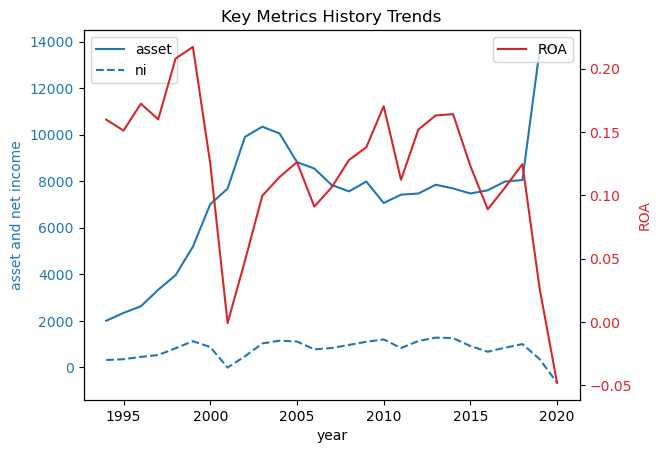

In [45]:
#GAP-only dataframe
GAP = tgt[tgt['conm'] == 'GAP INC']

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot data for the first y-axis
ax1.set_xlabel('year')
ax1.set_ylabel('asset and net income', color='tab:blue')
ax1.plot(GAP['fyear'], GAP['asset'], color='tab:blue', label='asset')
ax1.plot(GAP['fyear'], GAP['ni'], color='tab:blue', linestyle='--', label='ni')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('ROA', color='tab:red')
ax2.plot(GAP['fyear'], GAP['roa'], color='tab:red', label='ROA')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.title('Key Metrics History Trends')
plt.show()